<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyIMAGE</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>Image</b> analysis</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyIMAGE.png"></td>
</tr>
</table>

----
# Image processing: Grayscale

In this notebook, we convert a **color** image to a **grayscale** image.

As we load the image with the `Image.load` function from the `PIL` library,
we:
- first create a PIL object, `image`, 
- then a numpy array `image_arr`.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import PIL

<class 'numpy.ndarray'> uint8 3 (3264, 4928, 4)


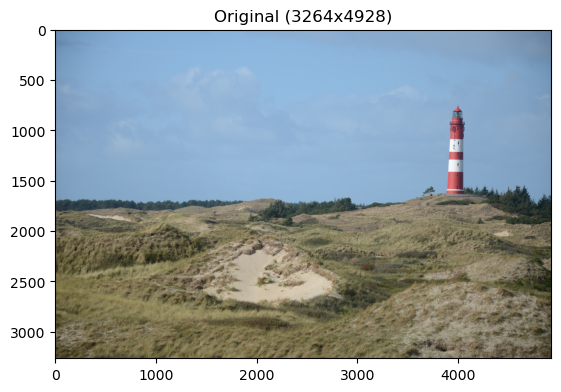

In [2]:
#image file name
infile='images/Amrum.png'

# load image with PIL library, convert to numpy array
image = PIL.Image.open(infile)
image_arr = np.asarray(image)
print (type(image_arr),image_arr.dtype,image_arr.ndim,image_arr.shape)

# show image
fig,axs = plt.subplots(1,1)
axs.set_title('Original ('+str(image_arr.shape[0])+'x'+str(image_arr.shape[1])+')')
axs.imshow(image_arr)

----
## Remove alpha channel
We first remove the alpha channel by simply dropping the last column of the third dimension
within the numpy array `image_arr`:

In [3]:
print('Original:         ',image_arr.shape,image_arr[0][0])
image_noalpha = image_arr[:,:,0:3]
print('No alpha channel: ',image_noalpha.shape,image_noalpha[0][0])

Original:          (3264, 4928, 4) [ 99 137 176 255]
No alpha channel:  (3264, 4928, 3) [ 99 137 176]


----
## Grayscale image

To obtain a **grayscale** image from a color image, several methods are available.

### Average over all three colors (average of all luminance values)

- A **simple** approach is to average the three color channels for each pixel:
$$
grey = \frac{r+g+b}{3}
$$
This can be achieved with the `np.mean` function, applied along the last axis of the 
color image array (without alpha channel).


[from](https://e2eml.school/convert_rgb_to_grayscale.html)

(3264, 4928) 137


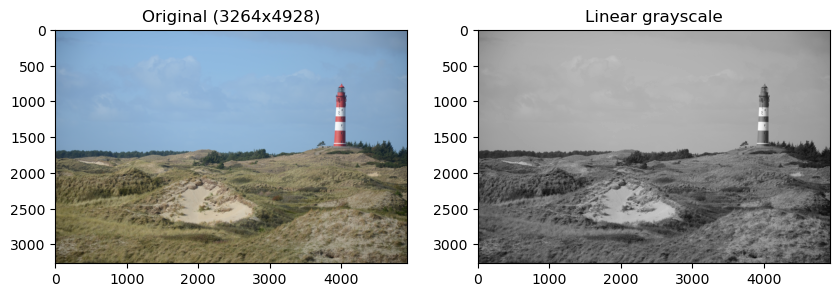

In [4]:
image_gray1 = np.mean(image_noalpha, axis=2).astype('uint8')
print(image_gray1.shape,image_gray1[0][0])

# show image
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].set_title('Original ('+str(image_arr.shape[0])+'x'+str(image_arr.shape[1])+')')
axs[0].imshow(image_arr)
axs[1].set_title('Linear grayscale')
axs[1].imshow(image_gray1,cmap='gray')

----
## Grayscale image

To obtain a **grayscale** image from a color image, several methods are available.

### Weighted average over all three colors (weighted average of all luminance values)

- A better representation is the `sRGB` color scale 
(M. Stokes, M. Anderson, S. Chandrasekar, and R. Motta: 
A Standard Default Color Space for the Internet – sRGB), using a **weighed average**:
$$
grey = 0.2126 r + 0.7152 g + 0.0722 b
$$

[from](https://e2eml.school/convert_rgb_to_grayscale.html)

(3264, 4928) 131


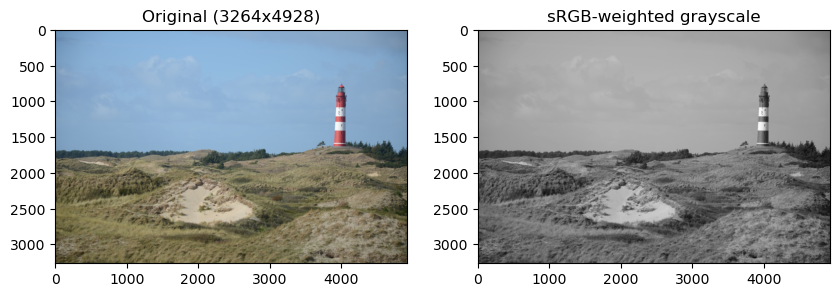

In [5]:
image_gray2 = np.zeros_like(image_gray1)
image_gray2[:,:] = (0.2126*image_noalpha[:,:,0]
                    +0.7152*image_noalpha[:,:,1]
                    +0.0722*image_noalpha[:,:,2]).astype('uint8')
print(image_gray2.shape,image_gray2[0][0])

# show image
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].set_title('Original ('+str(image_arr.shape[0])+'x'+str(image_arr.shape[1])+')')
axs[0].imshow(image_arr)
axs[1].set_title('sRGB-weighted grayscale')
axs[1].imshow(image_gray2,cmap='gray')

----